In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas dataframe
df = pd.read_csv('model.csv')

# Check the first 5 rows of the dataset
df.head()

,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,UGDS_BLACK,UGDS_ASIAN,UG25ABV,IRPS_WHITE,IRPS_ASIAN,IRPS_BLACK,FTFTPCTFLOAN,...,INEXPFTE,AVGFACSAL,PCTPELL,COST4,NPT4,TUITIONFEE1_IN,TUITIONFEE1_OUT,C100_4,C150_4,C200_4
0,0.6538,850.0,4348.0,0.9216,0.0018,0.0859,0.1220,0.0650,0.7033,0.8063,...,7941.0,7017.0,0.7249,20809.0,13435.0,9366.0,17136.0,0.3265,0.3081,0.3265
1,0.6043,1147.0,11269.0,0.2541,0.0595,0.2363,0.7271,0.1473,0.0569,0.5387,...,17548.0,10221.0,0.3505,22232.0,16023.0,7766.0,17654.0,0.5661,0.5462,0.5661
2,0.8120,1221.0,5829.0,0.1230,0.0381,0.2255,0.7227,0.1558,0.0405,0.4370,...,10619.0,9514.0,0.3179,20999.0,18661.0,9128.0,20622.0,0.5257,0.4935,0.5257
3,0.4639,844.0,4740.0,0.9251,0.0032,0.0974,0.2154,0.1038,0.5423,0.8137,...,7742.0,7940.0,0.7567,18100.0,13865.0,8720.0,15656.0,0.2865,0.2754,0.2865
4,0.5359,1181.0,31005.0,0.1092,0.0113,0.0810,0.7907,0.0663,0.0572,0.4254,...,10312.0,9710.0,0.2009,27205.0,20575.0,10170.0,25950.0,0.6890,0.6709,0.6890


In [3]:
features = [
    "FTFTPCTPELL",
    "SAT_AVG_ALL",
    "TUITIONFEE1_OUT",
    "DEBT_MDN",
    "UG25ABV",
    "AVGFACSAL",
    "UGDS",
    "COST4",
    "ADM_RATE_ALL",
    "UGDS_ASIAN"
]


In [4]:
df.shape

(3673, 25)

In [5]:
#importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Separate the features and target variables
X = df[features]
y = df[['C100_4', 'C150_4', 'C200_4']]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions on training and testing data
y_test_pred = reg.predict(X_test)
y_train_pred= reg.predict(X_train)



# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)



Training Set:
Mean Squared Error (MSE): 0.007738909802642902
R-squared (R2) Score: 0.7559189308824589

Testing Set:
Mean Squared Error (MSE): 0.007898636363366884
R-squared (R2) Score: 0.747723692152617


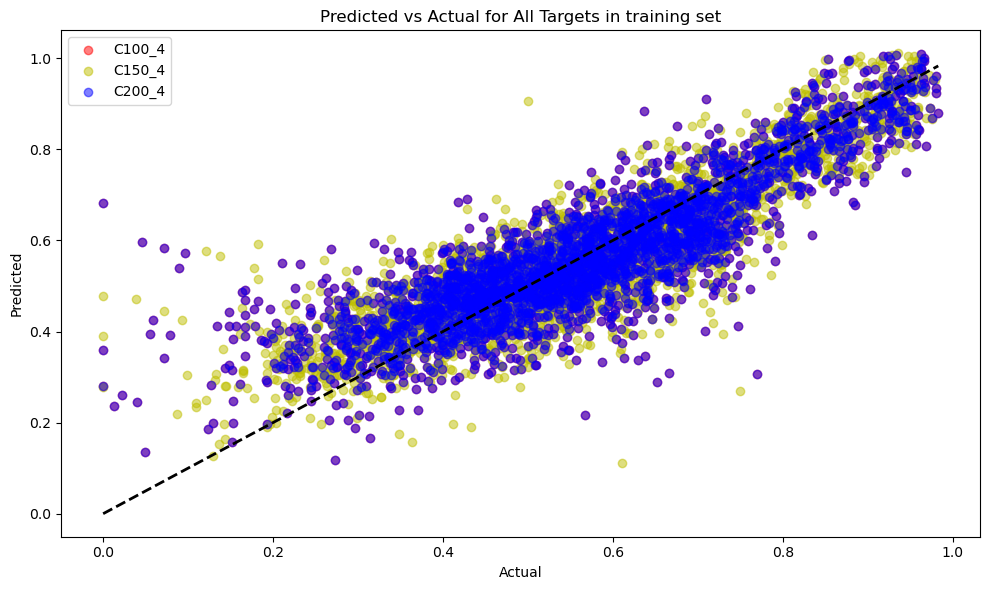

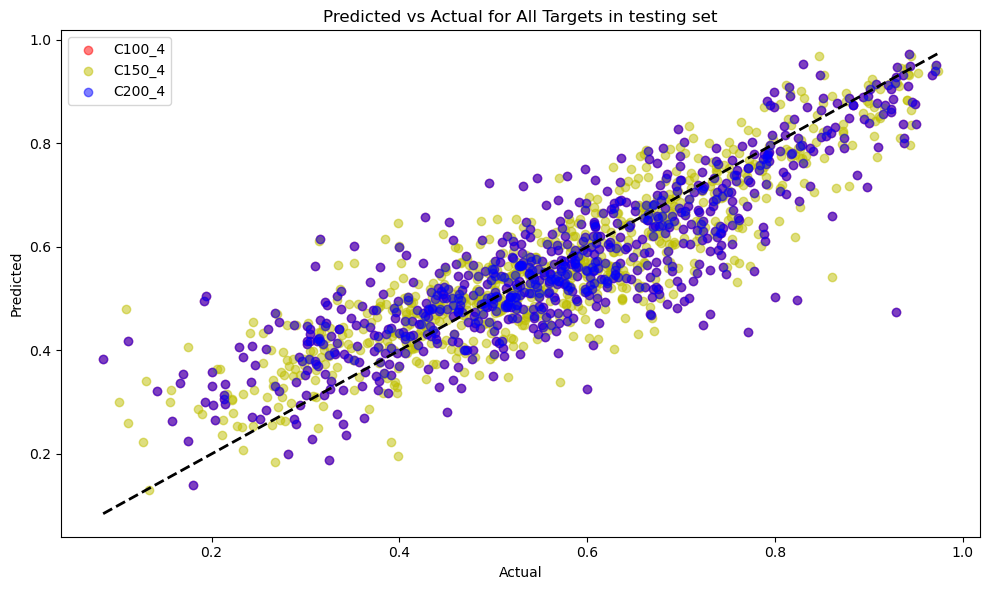

In [7]:
# Plot the predictions vs actual values in a single graph for training test
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_train.values)
max_val = np.max(y_train.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in training set')
plt.legend()

plt.tight_layout()
plt.show()


# Plot the predictions vs actual values in a single graph for testing set 
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_test.values)
max_val = np.max(y_test.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in testing set')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Transform features to polynomial features
degree = 3  # You can adjust this based on your needs
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Remember, only transform the test data

# Create and train the linear regression model on the polynomial features
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Predictions on training and testing data
y_train_pred = reg.predict(X_train_poly)
y_test_pred = reg.predict(X_test_poly)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Polynomial Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)
print("\nPolynomial Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)


Polynomial Regression - Training Set:
Mean Squared Error (MSE): 0.005164974004730822
R-squared (R2) Score: 0.8370715859765646

Polynomial Regression - Testing Set:
Mean Squared Error (MSE): 0.00890851799126682
R-squared (R2) Score: 0.7152506102139463


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Transform features to polynomial features
degree = 3  # You can adjust this based on your needs
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Remember, only transform the test data

# Create and train the Ridge regression model on the polynomial features
alpha_val = 50.0  # Regularization strength; adjust this based on your needs
ridge_reg = Ridge(alpha=alpha_val)
ridge_reg.fit(X_train_poly, y_train)

# Predictions on training and testing data
y_train_pred = ridge_reg.predict(X_train_poly)
y_test_pred = ridge_reg.predict(X_test_poly)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Polynomial Ridge Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)
print("\nPolynomial Ridge Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)



Polynomial Ridge Regression - Training Set:
Mean Squared Error (MSE): 0.005154179298467389
R-squared (R2) Score: 0.8374101281034457

Polynomial Ridge Regression - Testing Set:
Mean Squared Error (MSE): 0.008971313025037406
R-squared (R2) Score: 0.7132362156586526


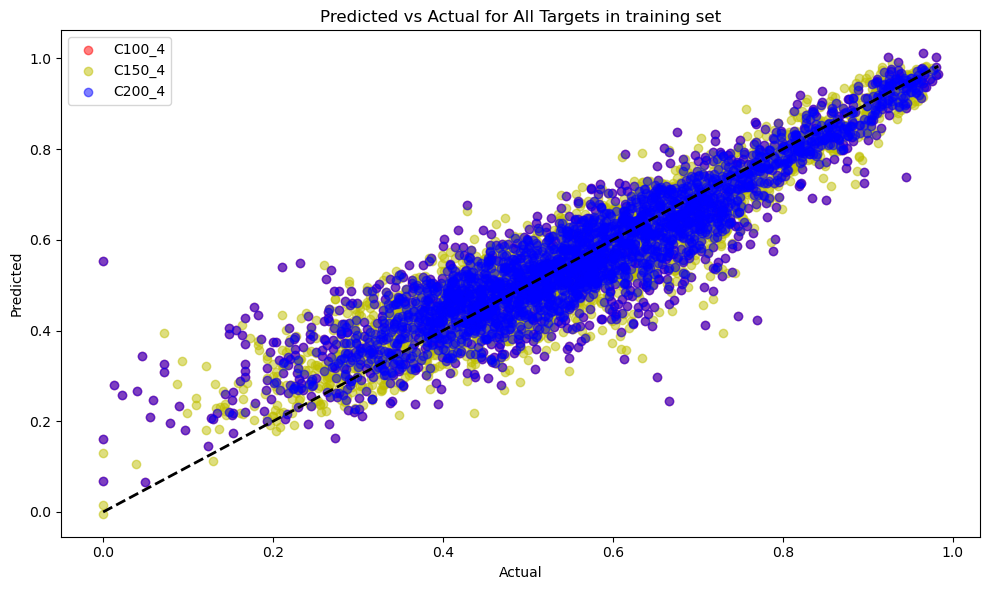

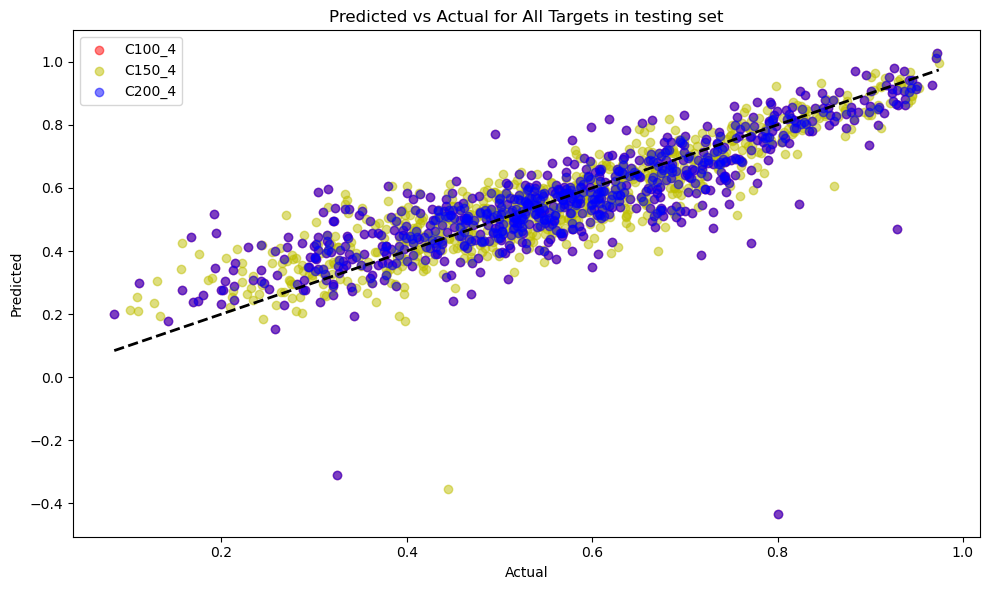

In [10]:
# Plot the predictions vs actual values in a single graph for training test
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_train.values)
max_val = np.max(y_train.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in training set')
plt.legend()

plt.tight_layout()
plt.show()


# Plot the predictions vs actual values in a single graph for testing set 
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_test.values)
max_val = np.max(y_test.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in testing set')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
from sklearn.linear_model import Lasso

alpha_value = 50  # You can adjust this based on your needs
lasso_reg = Lasso(alpha=alpha_value, max_iter=10000)  # Increasing max_iter might be necessary for convergence
lasso_reg.fit(X_train_poly, y_train)

y_train_pred = lasso_reg.predict(X_train_poly)
y_test_pred = lasso_reg.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Polynomial Lasso Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)

print("\nPolynomial Lasso Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)



Polynomial Lasso Regression - Training Set:
Mean Squared Error (MSE): 0.0057923363147719216
R-squared (R2) Score: 0.8172814744793789

Polynomial Lasso Regression - Testing Set:
Mean Squared Error (MSE): 0.0075542403904474975
R-squared (R2) Score: 0.7587615927193587


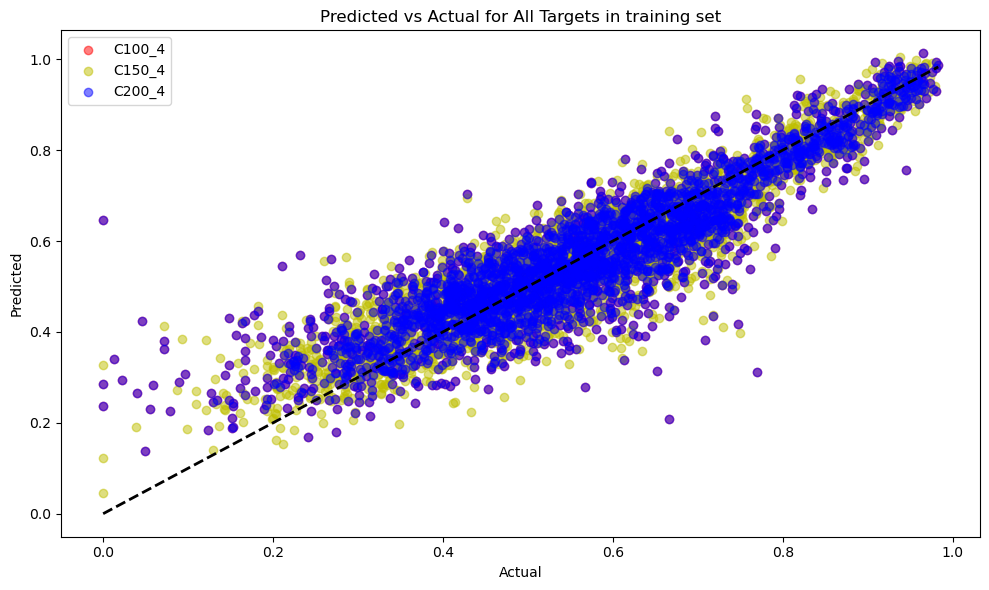

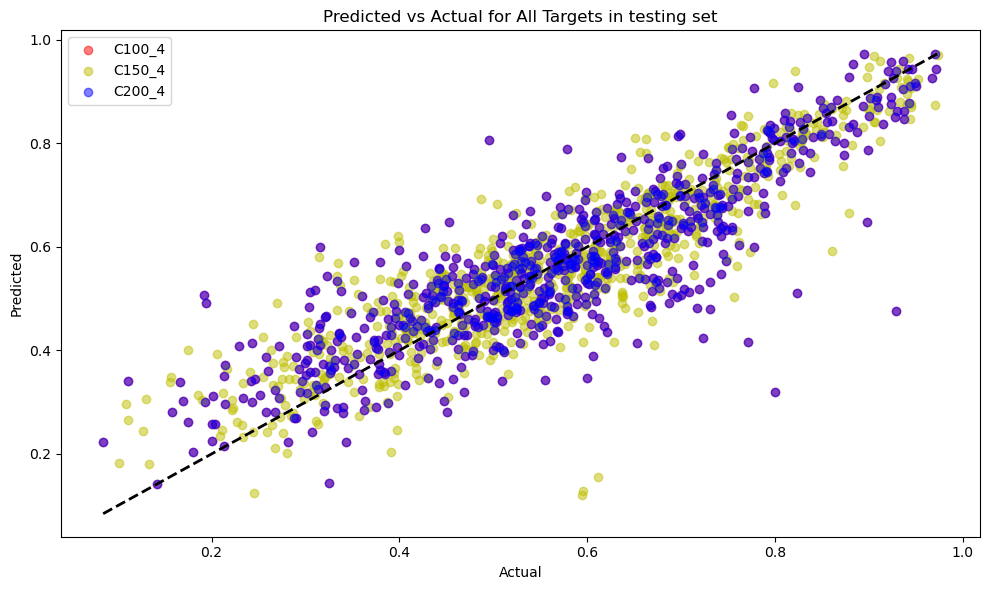

In [12]:
# Plot the predictions vs actual values in a single graph for training test
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_train.values)
max_val = np.max(y_train.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in training set')
plt.legend()

plt.tight_layout()
plt.show()


# Plot the predictions vs actual values in a single graph for testing set 
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_test.values)
max_val = np.max(y_test.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in testing set')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2938, 10)
(735, 10)
(2938, 3)
(735, 3)


In [14]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Create the regressor object
tree_reg = DecisionTreeRegressor(max_depth=13)  # You can adjust the max_depth based on your needs

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

# Calculate metrics for training data (if desired)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data (if desired)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Decision Tree Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)

print("\nDecision Tree Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)


Decision Tree Regression - Training Set:
Mean Squared Error (MSE): 0.0014542914895070286
R-squared (R2) Score: 0.9541574865364169

Decision Tree Regression - Testing Set:
Mean Squared Error (MSE): 0.012177051844947684
R-squared (R2) Score: 0.6111031669124248


In [15]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('model.csv')

# Check the first 5 rows of the dataset
df.head()

,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,UGDS_BLACK,UGDS_ASIAN,UG25ABV,IRPS_WHITE,IRPS_ASIAN,IRPS_BLACK,FTFTPCTFLOAN,...,INEXPFTE,AVGFACSAL,PCTPELL,COST4,NPT4,TUITIONFEE1_IN,TUITIONFEE1_OUT,C100_4,C150_4,C200_4
0,0.6538,850.0,4348.0,0.9216,0.0018,0.0859,0.1220,0.0650,0.7033,0.8063,...,7941.0,7017.0,0.7249,20809.0,13435.0,9366.0,17136.0,0.3265,0.3081,0.3265
1,0.6043,1147.0,11269.0,0.2541,0.0595,0.2363,0.7271,0.1473,0.0569,0.5387,...,17548.0,10221.0,0.3505,22232.0,16023.0,7766.0,17654.0,0.5661,0.5462,0.5661
2,0.8120,1221.0,5829.0,0.1230,0.0381,0.2255,0.7227,0.1558,0.0405,0.4370,...,10619.0,9514.0,0.3179,20999.0,18661.0,9128.0,20622.0,0.5257,0.4935,0.5257
3,0.4639,844.0,4740.0,0.9251,0.0032,0.0974,0.2154,0.1038,0.5423,0.8137,...,7742.0,7940.0,0.7567,18100.0,13865.0,8720.0,15656.0,0.2865,0.2754,0.2865
4,0.5359,1181.0,31005.0,0.1092,0.0113,0.0810,0.7907,0.0663,0.0572,0.4254,...,10312.0,9710.0,0.2009,27205.0,20575.0,10170.0,25950.0,0.6890,0.6709,0.6890


In [16]:
X=df.drop(columns=['C100_4','C150_4','C200_4'])
y=df[['C100_4','C150_4','C200_4']]

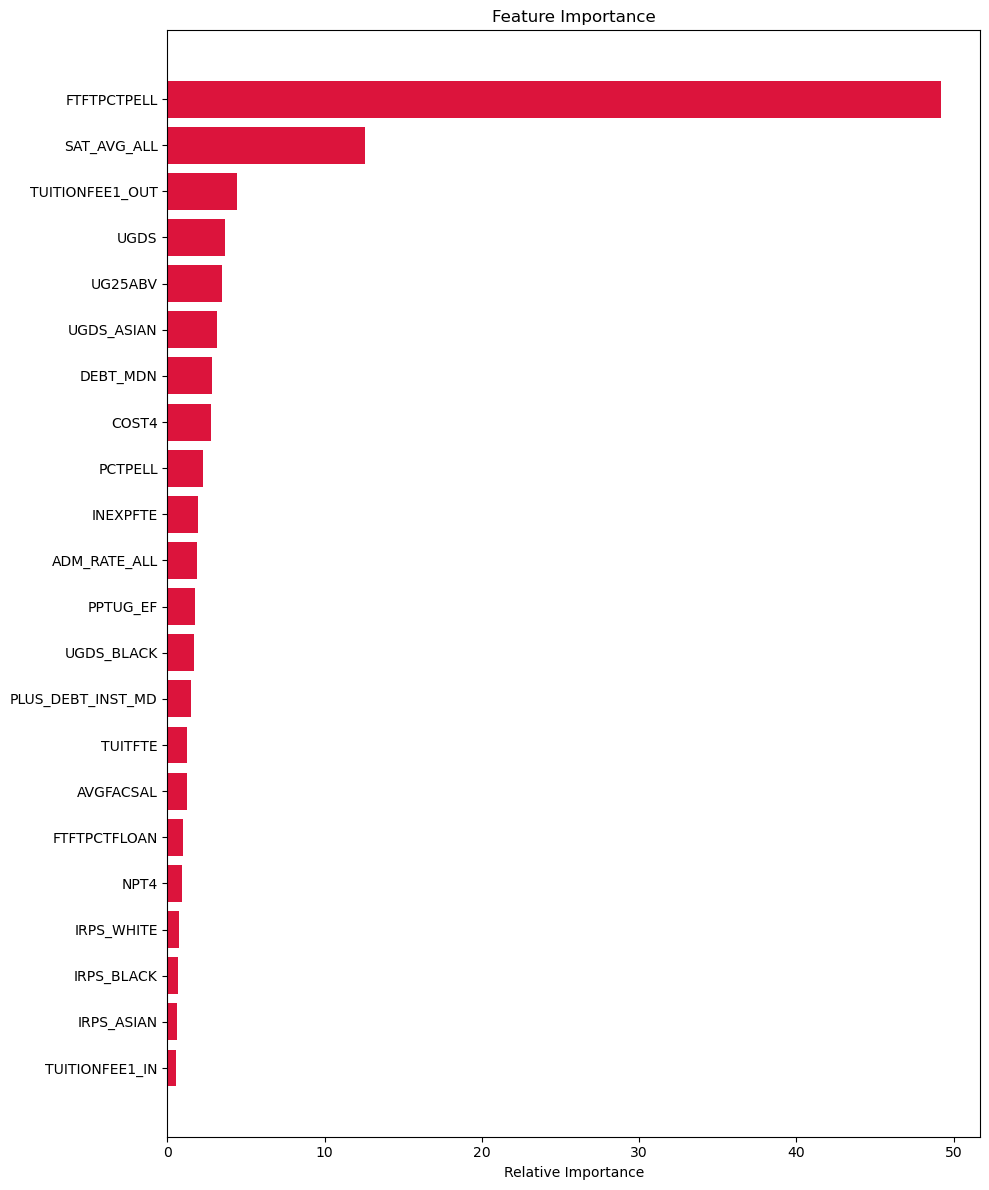

In [17]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Instantiating the tree regressor
tr_reg = DecisionTreeRegressor() 

# Fitting the data
tr_reg.fit(X, y) 

# Calculating the feature importance
feature_importance = tr_reg.feature_importances_

# Normalizing the feature importance
feature_importance = 100.0 * (feature_importance / np.sum(feature_importance))

# Sorting the indices based on importance score
sorted_idx = np.argsort(feature_importance)

# Plotting
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(10, 12))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")

# Assuming you have the feature names stored in X.columns
plt.yticks(pos, X.columns[sorted_idx])

plt.tight_layout()
plt.show()


In [18]:
# Extracting feature names
feature_names = X.columns

# Sorting features based on importance
sorted_feature_names = feature_names[sorted_idx]

# Getting the top 10 features
top_10_features = sorted_feature_names[-10:]

print(top_10_features)

print("Top 10 Important Features:")
for feature in reversed(top_10_features):
    print(feature)

    

Index(['INEXPFTE', 'PCTPELL', 'COST4', 'DEBT_MDN', 'UGDS_ASIAN', 'UG25ABV',
       'UGDS', 'TUITIONFEE1_OUT', 'SAT_AVG_ALL', 'FTFTPCTPELL'],
      dtype='object')
Top 10 Important Features:
FTFTPCTPELL
SAT_AVG_ALL
TUITIONFEE1_OUT
UGDS
UG25ABV
UGDS_ASIAN
DEBT_MDN
COST4
PCTPELL
INEXPFTE


In [19]:
X = df[top_10_features]


In [20]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor


# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regressor object
tree_reg = DecisionTreeRegressor(max_depth=9)  # You can adjust the max_depth based on your needs

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

# Calculate metrics for training data (if desired)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data (if desired)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Decision Tree Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)

print("\nDecision Tree Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)


Decision Tree Regression - Training Set:
Mean Squared Error (MSE): 0.003903644238831427
R-squared (R2) Score: 0.8769173982194495

Decision Tree Regression - Testing Set:
Mean Squared Error (MSE): 0.011377194261191164
R-squared (R2) Score: 0.636491526156821


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [5,7,9,10,11,12,13],
    'min_samples_split': [100,150,200,300,350],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Instantiate a DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Instantiate the GridSearchCV object and fit to the data
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 100}
Best cross-validation score: -0.01


In [ ]:
# Instantiate the DecisionTreeRegressor with best parameters
tree_reg = DecisionTreeRegressor(
    max_depth=9,
    min_samples_split=100,
    
)

# Fit the model to your data
tree_reg.fit(X, y)

In [23]:
# Make predictions on training and testing data
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

# Calculate metrics for training data (if desired)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data (if desired)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Decision Tree Regression - Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)

print("\nDecision Tree Regression - Testing Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)


Decision Tree Regression - Training Set:
Mean Squared Error (MSE): 0.006671050493291099
R-squared (R2) Score: 0.7896261211260668

Decision Tree Regression - Testing Set:
Mean Squared Error (MSE): 0.007617150763031347
R-squared (R2) Score: 0.7568091370437907


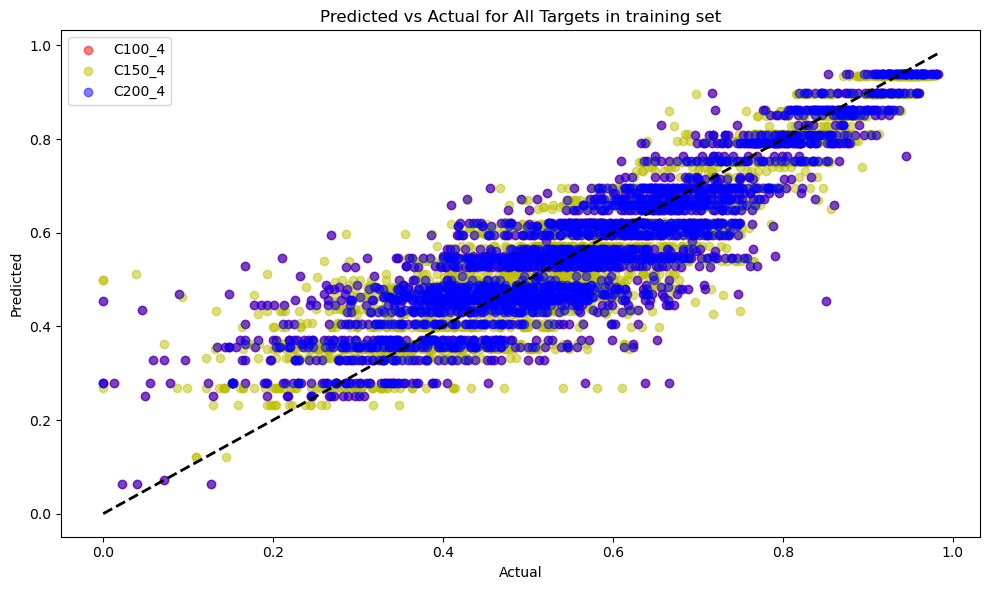

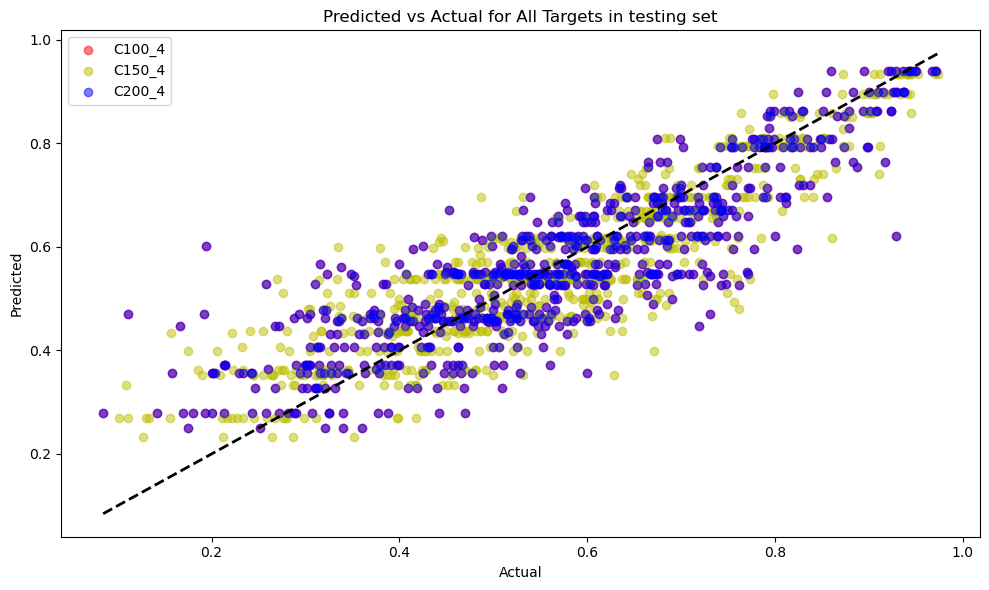

In [34]:
# Plot the predictions vs actual values in a single graph for training test
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_train.iloc[:, i], y_train_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_train.values)
max_val = np.max(y_train.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in training set')
plt.legend()

plt.tight_layout()
plt.show()


# Plot the predictions vs actual values in a single graph for testing set 
colors = ['r', 'y', 'b']
titles = ['C100_4', 'C150_4', 'C200_4']

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    plt.scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.5, c=color, label=titles[i])

# Create an ideal prediction line
min_val = np.min(y_test.values)
max_val = np.max(y_test.values)

plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Targets in testing set')
plt.legend()

plt.tight_layout()
plt.show()


# Bagged Regressor 

In [35]:
# Importing BaggingRegressor from ensemble module
# Performing Linear Regression as base estimator 

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.7559 

R^2 score for test dataset =  0.7477 

Mean Squared Error train and test: 0.007898332158343279 0.007738947987728554


In [36]:
# performing Polynomial regression as based estimator 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Instantiate the polynomial features transformer
poly_transformer = PolynomialFeatures(degree=3)

# Transform the X_train and X_test data using the polynomial transformer
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Instantiate the bagged tree regressor with polynomial features
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, max_features=10, random_state=3)

# Fit the bagged tree regressor to the training data
bag_reg.fit(X_train_poly, y_train)

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train_poly)
test_y_pred = bag_reg.predict(X_test_poly)
r2_train_score = bag_reg.score(X_train_poly, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test_poly, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.7249 

R^2 score for test dataset =  0.7004 

Mean Squared Error train and test: 0.009380749460822398 0.008724162579260045


#Random Forest Regressor 


In [37]:
features = [
    "FTFTPCTPELL",
    "SAT_AVG_ALL",
    "TUITIONFEE1_OUT",
    "DEBT_MDN",
    "UG25ABV",
    "AVGFACSAL",
    "UGDS",
    "COST4",
    "ADM_RATE_ALL",
    "UGDS_ASIAN"
]


In [38]:

# Separate the features and target variables
X = df[features]
y = df[['C100_4', 'C150_4', 'C200_4']]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)  # Instantiating the forest
rf_reg.fit(X_train, y_train)

# Finding the predictions of random forest regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9753 

R^2 score for test dataset =  0.7908 

Mean Squared Error train and test: 0.0065488270307709024 0.000781821354152011


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Existing code for setting up and training the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)
rf_reg.fit(X_train, y_train)

# GridSearchCV to find best hyperparameters
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [7,9,10, 12, 13,14,20],
    'min_samples_split': [30,50,70,100],
    'min_samples_leaf': [50,75,100,150]
}

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Evaluating the model with best parameters
best_rf = grid_search.best_estimator_

train_y_pred_best = best_rf.predict(X_train)
test_y_pred_best = best_rf.predict(X_test)

r2_train_score_best = best_rf.score(X_train, y_train)
r2_test_score_best = best_rf.score(X_test, y_test)

mse_train_best = mean_squared_error(y_train, train_y_pred_best)
mse_test_best = mean_squared_error(y_test, test_y_pred_best)

print("Best parameters found: ", grid_search.best_params_)
print('R^2 score for train dataset with best parameters = ', round(r2_train_score_best, 4))
print('R^2 score for test dataset with best parameters = ', round(r2_test_score_best, 4))
print("Mean Squared Error for train with best parameters:", mse_train_best)
print("Mean Squared Error for test with best parameters:", mse_test_best)


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 30, 'n_estimators': 1000}
R^2 score for train dataset with best parameters =  0.7846
R^2 score for test dataset with best parameters =  0.7471
Mean Squared Error for train with best parameters: 0.006828150193540152
Mean Squared Error for test with best parameters: 0.007918391593776263


# Xgbooster

In [30]:
!pip install xgboost

In [31]:
# Importing 'xgboost

import xgboost as xgb 

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor()  

xgb_reg.fit(X_train, y_train)  # Fitting the train data  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9929 

R^2 score for test dataset =  0.7833 

Mean Squared Error train and test: 0.006785168475286272 0.00022437157691229591


In [33]:
from sklearn.model_selection import GridSearchCV

# create XGBRegressor object
xgb_reg = xgb.XGBRegressor()

# define hyperparameters to search over
params = {
    'n_estimators': [100, 500, 700],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

KeyboardInterrupt: 